<a href="https://colab.research.google.com/github/KritiJain01/AI-Lab/blob/main/AIAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Path = '/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access.log'


In [30]:
import shlex
from datetime import datetime
read = open("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access1.log", "r")
hasil = open("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access1.csv", "x")


hasil.write("ip_address,identd,userid,time,request_line,status_code,object_size,referrer,user_agent\n")
for line in read:
    #print(line)
    if ("." or '"') in line:
        splited_line = shlex.split(line)
        splited_line[3] = splited_line[3] + " " + splited_line[4]
        splited_line.pop(4)

        splited_line[3] = splited_line[3].strip("[")
        splited_line[3] = splited_line[3].strip("]")
        splited_line[3] = datetime.strptime(splited_line[3],"%d/%b/%Y:%H:%M:%S %z").strftime("%Y-%m-%d %H:%M:%S")

        print(splited_line)
        converted_line = ""
        for word in splited_line:
            converted_line = converted_line + "\"" + word.strip() + "\"" + ","
        hasil.write(converted_line+"\n")
print("finish")

Streaming output truncated to the last 5000 lines.
['95.82.59.254', '-', '-', '2015-05-19 03:05:19', 'GET /images/jordan-80.png HTTP/1.1', '200', '6146', 'http://www.semicomplete.com/articles/dynamic-dns-with-dhcp/', 'Mozilla/5.0 (Windows NT 6.1; rv:27.0) Gecko/20100101 Firefox/27.0']
['95.82.59.254', '-', '-', '2015-05-19 04:05:18', 'GET /images/web/2009/banner.png HTTP/1.1', '200', '52315', 'http://www.semicomplete.com/style2.css', 'Mozilla/5.0 (Windows NT 6.1; rv:27.0) Gecko/20100101 Firefox/27.0']
['180.153.236.175', '-', '-', '2015-05-19 04:05:08', 'GET /articles/dynamic-dns-with-dhcp/ HTTP/1.1', '200', '18848', 'http://www.semicomplete.com/articles/dynamic-dns-with-dhcp/', 'Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; )  Firefox/1.5.0.11; 360Spider']
['180.76.5.152', '-', '-', '2015-05-19 04:05:51', 'GET /files/hello/?C=S;O=A HTTP/1.1', '200', '1127', '-', 'Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)']
['217.26.210.20', '-', '-', '2015-0

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
log_df = pd.read_csv("/content/drive/MyDrive/CSAI/Year 2/Artificial Intelligence/access1.csv", index_col = False)
log_df['time'] = pd.to_datetime(log_df['time'])

In [33]:
log_df.head()

,ip_address,identd,userid,time,request_line,status_code,object_size,referrer,user_agent
0,80.108.25.232,-,-,2015-05-18 21:05:29,GET /presentations/logstash-puppetconf-2012/im...,200,52878,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
1,80.108.25.232,-,-,2015-05-18 21:05:09,GET /presentations/logstash-puppetconf-2012/im...,200,80663,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
2,80.108.25.232,-,-,2015-05-18 21:05:57,GET /presentations/logstash-puppetconf-2012/im...,200,100207,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
3,80.108.25.232,-,-,2015-05-18 21:05:58,GET /presentations/logstash-puppetconf-2012/im...,200,9618,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (X11; Linux x86_64; rv:27.0) Gecko...
4,46.105.14.53,-,-,2015-05-18 21:05:10,GET /blog/tags/puppet?flav=rss20 HTTP/1.1,200,14872,-,UniversalFeedParser/4.2-pre-314-svn +http://fe...


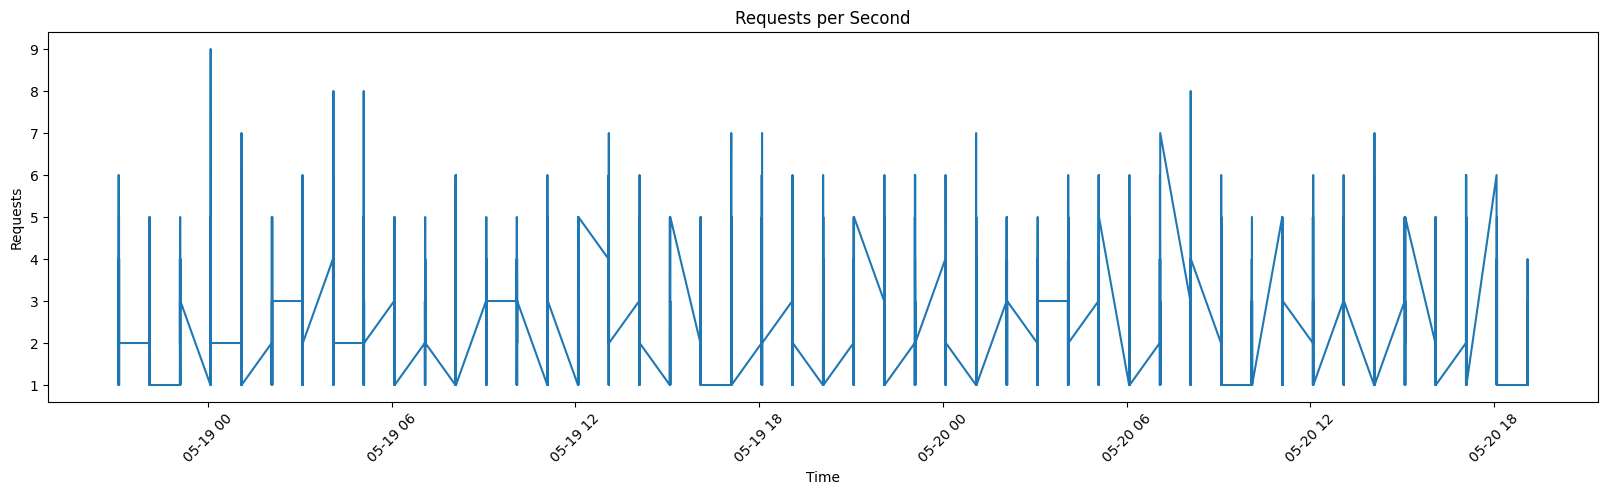

In [48]:
def plot_requests_per_second(df, width = 6.4, height = 4.8):
    requests_per_second = df['time'].value_counts().sort_index()
    plt.plot(requests_per_second.index, requests_per_second.values)
    plt.gcf().set_size_inches(width, height)
    plt.xlabel('Time')
    plt.ylabel('Requests')
    plt.title('Requests per Second')
    plt.xticks(rotation=45)
    plt.show()
plot_requests_per_second(log_df, 20)

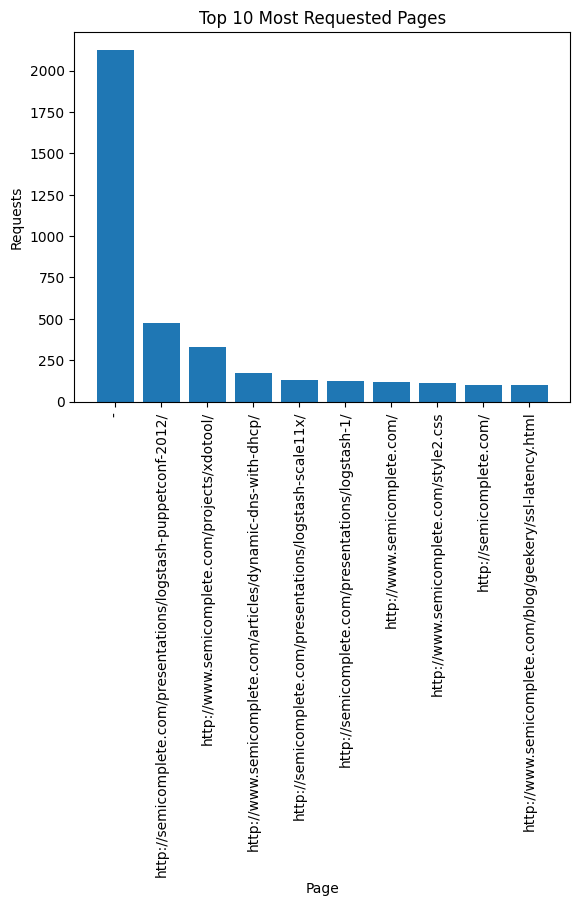

In [49]:
def plot_top_pages(df, top=10, width = 6.4, height = 4.8):
    top_pages = df['referrer'].value_counts().head(top)
    plt.bar(top_pages.index, top_pages.values)
    plt.gcf().set_size_inches(width, height)
    plt.xlabel('Page')
    plt.ylabel('Requests')
    plt.title('Top {} Most Requested Pages'.format(top))
    plt.xticks(rotation=90)
    plt.show()
plot_top_pages(log_df)

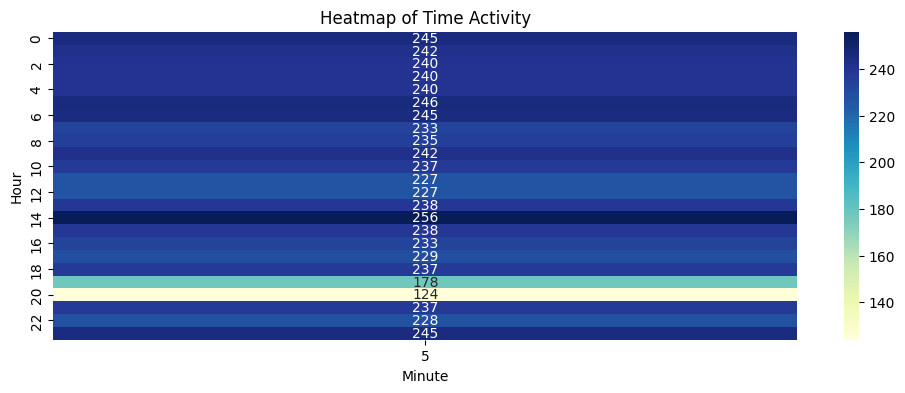

In [66]:
import seaborn as sns

def plot_heatmap(df):
    # Create a DataFrame with columns for 'hour' and 'minute'
    df_heatmap = pd.DataFrame({'hour': df['time'].dt.hour, 'minute': df['time'].dt.minute, 'second' : df['time'].dt.second})
    # Create a 2D grid representing the average number of requests for each hour and minute
    grid = df_heatmap.groupby(['hour', 'minute']).size().unstack().fillna(0)
    # Generate the heatmap
    plt.figure(figsize=(12, 4))
    sns.heatmap(grid, cmap='YlGnBu', annot=True, fmt='g')
    plt.title('Heatmap of Time Activity')
    plt.xlabel('Minute')
    plt.ylabel('Hour')
    plt.show()
plot_heatmap(log_df)
#Due to the data available the graph below is like this

In [90]:
def publ_report(df, top = 5):
    status_codes = df['status_code'].value_counts()

    def errors():
        for i in status_codes.index:
            if(i == 200):
                continue
            code = "Code "
            times = "times"
            value = status_codes[i]
            print(f"{code}{i} : {value} {times}")

    report = {
        'Total Requests': df.shape[0],
        'Top {} IP Addresses'.format(top): df['ip_address'].value_counts().head(top).index.tolist(),
        'Top {} User Agents'.format(top): df['user_agent'].value_counts().head(top).index.tolist(),
        'Top {} Requested URLs'.format(top): df['referrer'].value_counts().head(top).index.tolist(),
        'Successful Requests' : df['status_code'].value_counts()[200].sum()
    }

    # Print the report
    print('Web Log Analysis Report:')
    for key, value in report.items():
        print(f'{key}: {value}')
    print('Other Status Codes Obtained')
    errors()
    # print(report["Other Status Codes Obtained"])
publ_report(log_df)

Web Log Analysis Report:
Total Requests: 5542
Top 5 IP Addresses: ['130.237.218.86', '66.249.73.135', '46.105.14.53', '75.97.9.59', '68.180.224.225']
Top 5 User Agents: ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.107 Safari/537.36', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.91 Safari/537.36', 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) Gecko/20100101 Firefox/27.0', 'UniversalFeedParser/4.2-pre-314-svn +http://feedparser.org/', 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.107 Safari/537.36']
Top 5 Requested URLs: ['-', 'http://semicomplete.com/presentations/logstash-puppetconf-2012/', 'http://www.semicomplete.com/projects/xdotool/', 'http://www.semicomplete.com/articles/dynamic-dns-with-dhcp/', 'http://semicomplete.com/presentations/logstash-scale11x/']
Successful Requests: 5145
Other Status Codes Obtained
Code 304 : 190 times
Code